# Happiness Predictor

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import linear_model

In [9]:
df = pd.read_pickle('happiness_data.pkl')
df

,Country,Year,Score,Ind 1,Ind 2,Ind 3,Ind 4,Ind 5,Ind 6,Ind 7,...,Ind 24,Ind 25,Ind 26,Ind 27,Ind 28,Ind 29,Ind 30,Ind 31,Ind 32,Ind 33
0,Afghanistan,2015,3.575,71.500000,95.596610,4.618468,4.923567,2.643742,-10.288447,88.768727,...,73.1,33736494.0,37.720880,44.328770,18.423477,6.528600e+05,7.585382,55.125527,17.080000,136.123066
1,Afghanistan,2016,3.360,84.137138,95.596610,4.618468,4.923567,2.643742,-10.879392,86.570932,...,70.4,34656032.0,42.684640,44.169360,25.154055,6.528600e+05,11.228852,47.659055,17.080000,136.123066
2,Afghanistan,2017,3.794,92.068569,95.596610,4.618468,4.923567,2.935513,2.461328,84.587278,...,67.9,35530081.0,38.667560,44.009950,31.884633,6.528600e+05,14.872321,51.236881,17.080000,136.123066
3,Albania,2015,4.959,100.000000,95.596610,4.618468,4.923567,3.227285,15.802049,44.016644,...,9.4,2880703.0,13.505890,18.615570,38.615210,2.875000e+04,18.515790,71.801016,17.080000,136.123066
4,Albania,2016,4.655,100.000000,95.658550,3.196611,3.361734,3.227285,16.646368,44.001540,...,9.1,2876101.0,12.221370,18.198440,25.763127,2.875000e+04,17.557178,74.669260,15.415000,136.123066
5,Albania,2017,4.644,99.668354,97.061750,0.218084,-0.623930,3.847240,26.725113,44.059506,...,8.8,2873457.0,11.602650,17.944780,12.911043,2.875000e+04,18.860235,78.081456,13.750000,136.123066
6,Algeria,2015,5.605,99.336708,99.267100,-2.760442,-4.609593,4.467196,36.803859,52.724919,...,24.9,39871528.0,14.635358,23.836130,0.058959,2.381740e+06,16.895681,59.695129,11.206100,136.123066
7,Algeria,2016,6.355,99.439568,99.231210,-4.133982,-5.868105,4.467196,35.528237,53.907887,...,24.5,40606052.0,17.668066,24.235500,16.562043,2.381740e+06,14.931127,55.892244,10.202400,136.123066
8,Algeria,2017,5.872,70.719784,99.442930,3.175451,0.446758,4.018598,17.538423,55.028217,...,24.0,41318142.0,20.700774,24.225050,33.065126,2.381740e+06,12.966573,56.140352,13.570000,136.123066
9,Angola,2015,4.033,42.000000,99.515772,10.484883,6.761621,3.570000,-0.451391,97.576199,...,88.9,27859305.0,23.733482,50.029510,49.568210,1.246700e+06,11.002019,62.888521,12.699566,136.123066


In [39]:
years_train = [2015,2016]
years_test = [2017]
train_features = df.loc[df['Year'].isin(years_train)]
test_features = df.loc[df['Year'].isin(years_test)]
train_features.reset_index(inplace=True,drop=True)
test_features.reset_index(inplace=True,drop=True)
train_features

,Country,Year,Score,Ind 1,Ind 2,Ind 3,Ind 4,Ind 5,Ind 6,Ind 7,...,Ind 24,Ind 25,Ind 26,Ind 27,Ind 28,Ind 29,Ind 30,Ind 31,Ind 32,Ind 33
0,Afghanistan,2015,3.575,71.500000,95.596610,4.618468,4.923567,2.643742,-10.288447,88.768727,...,73.1,33736494.0,37.720880,44.328770,18.423477,6.528600e+05,7.585382,55.125527,17.080000,136.123066
1,Afghanistan,2016,3.360,84.137138,95.596610,4.618468,4.923567,2.643742,-10.879392,86.570932,...,70.4,34656032.0,42.684640,44.169360,25.154055,6.528600e+05,11.228852,47.659055,17.080000,136.123066
2,Albania,2015,4.959,100.000000,95.596610,4.618468,4.923567,3.227285,15.802049,44.016644,...,9.4,2880703.0,13.505890,18.615570,38.615210,2.875000e+04,18.515790,71.801016,17.080000,136.123066
3,Albania,2016,4.655,100.000000,95.658550,3.196611,3.361734,3.227285,16.646368,44.001540,...,9.1,2876101.0,12.221370,18.198440,25.763127,2.875000e+04,17.557178,74.669260,15.415000,136.123066
4,Algeria,2015,5.605,99.336708,99.267100,-2.760442,-4.609593,4.467196,36.803859,52.724919,...,24.9,39871528.0,14.635358,23.836130,0.058959,2.381740e+06,16.895681,59.695129,11.206100,136.123066
5,Algeria,2016,6.355,99.439568,99.231210,-4.133982,-5.868105,4.467196,35.528237,53.907887,...,24.5,40606052.0,17.668066,24.235500,16.562043,2.381740e+06,14.931127,55.892244,10.202400,136.123066
6,Angola,2015,4.033,42.000000,99.515772,10.484883,6.761621,3.570000,-0.451391,97.576199,...,88.9,27859305.0,23.733482,50.029510,49.568210,1.246700e+06,11.002019,62.888521,12.699566,136.123066
7,Angola,2016,3.866,40.520607,99.588615,2.615014,-0.783083,3.570000,3.061931,97.274212,...,84.6,28813463.0,26.766190,46.742397,36.392166,1.246700e+06,9.732512,53.370155,11.829133,136.123066
8,Argentina,2015,6.574,99.995209,99.734300,2.193567,1.166753,5.057314,14.603558,56.549007,...,11.4,43417765.0,23.640815,40.168170,10.040078,2.780400e+06,12.336507,22.486226,10.088266,136.123066
9,Argentina,2016,6.650,100.000000,99.341520,-2.172171,-3.130795,5.057314,13.961236,56.542246,...,10.9,43847430.0,22.078128,36.881057,11.957386,2.780400e+06,12.155505,26.121914,9.217833,136.123066


In [40]:
df_train = train_features.drop(columns=['Country','Year','Score'],axis=1)
df_test = test_features.drop(columns=['Country','Year','Score'],axis=1)
df_train

,Ind 1,Ind 2,Ind 3,Ind 4,Ind 5,Ind 6,Ind 7,Ind 8,Ind 9,Ind 10,...,Ind 24,Ind 25,Ind 26,Ind 27,Ind 28,Ind 29,Ind 30,Ind 31,Ind 32,Ind 33
0,71.500000,95.596610,4.618468,4.923567,2.643742,-10.288447,88.768727,33.980,10.583519,41.328264,...,73.1,33736494.0,37.720880,44.328770,18.423477,6.528600e+05,7.585382,55.125527,17.080000,136.123066
1,84.137138,95.596610,4.618468,4.923567,2.643742,-10.879392,86.570932,33.214,10.583519,41.328264,...,70.4,34656032.0,42.684640,44.169360,25.154055,6.528600e+05,11.228852,47.659055,17.080000,136.123066
2,100.000000,95.596610,4.618468,4.923567,3.227285,15.802049,44.016644,11.879,10.583519,41.328264,...,9.4,2880703.0,13.505890,18.615570,38.615210,2.875000e+04,18.515790,71.801016,17.080000,136.123066
3,100.000000,95.658550,3.196611,3.361734,3.227285,16.646368,44.001540,11.816,10.583519,41.328264,...,9.1,2876101.0,12.221370,18.198440,25.763127,2.875000e+04,17.557178,74.669260,15.415000,136.123066
4,99.336708,99.267100,-2.760442,-4.609593,4.467196,36.803859,52.724919,23.900,10.583519,41.328264,...,24.9,39871528.0,14.635358,23.836130,0.058959,2.381740e+06,16.895681,59.695129,11.206100,136.123066
5,99.439568,99.231210,-4.133982,-5.868105,4.467196,35.528237,53.907887,23.132,10.583519,41.328264,...,24.5,40606052.0,17.668066,24.235500,16.562043,2.381740e+06,14.931127,55.892244,10.202400,136.123066
6,42.000000,99.515772,10.484883,6.761621,3.570000,-0.451391,97.576199,42.321,10.583519,41.328264,...,88.9,27859305.0,23.733482,50.029510,49.568210,1.246700e+06,11.002019,62.888521,12.699566,136.123066
7,40.520607,99.588615,2.615014,-0.783083,3.570000,3.061931,97.274212,41.819,10.583519,41.328264,...,84.6,28813463.0,26.766190,46.742397,36.392166,1.246700e+06,9.732512,53.370155,11.829133,136.123066
8,99.995209,99.734300,2.193567,1.166753,5.057314,14.603558,56.549007,17.364,10.583519,41.328264,...,11.4,43417765.0,23.640815,40.168170,10.040078,2.780400e+06,12.336507,22.486226,10.088266,136.123066
9,100.000000,99.341520,-2.172171,-3.130795,5.057314,13.961236,56.542246,17.172,10.583519,41.328264,...,10.9,43847430.0,22.078128,36.881057,11.957386,2.780400e+06,12.155505,26.121914,9.217833,136.123066


In [42]:
y_train = pd.DataFrame(train_features['Score'])
y_test = pd.DataFrame(test_features['Score'])

In [44]:
rf = RandomForestRegressor(n_estimators=1000)
rf.fit(df_train,y_train.values.ravel())

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [51]:
predictions = rf.predict(df_test)
errors = abs(predictions - y_test.values.ravel())
print('Mean Absolute Error:',round(np.mean(errors),2),'degrees')

Mean Absolute Error: 0.41 degrees


In [52]:
mape = 100 * (errors / y_test.values.ravel())
accuracy = 100 - np.mean(mape)
print(accuracy)

92.43944226961338


In [56]:
lr=linear_model.LinearRegression()
lr.fit(df_train,y_train.values.ravel())

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [61]:
predictions = lr.predict(df_test)
errors = abs(predictions - y_test.values.ravel())
errors

array([1.63007396, 0.281436  , 2.51576253, 2.52318819, 0.48545324,
       0.70835383, 0.58094389, 0.83515628, 0.61335264, 1.36039575,
       0.38826275, 0.15882638, 2.85784772, 2.6124372 , 0.03099502,
       0.49563449, 0.7906749 , 1.55999768, 0.37806263, 1.49901928,
       0.70079299, 1.58843291, 1.59922491, 1.6808401 , 3.5413999 ,
       3.0171175 , 0.48096161, 0.21984978, 0.23065434, 1.55165358,
       0.89112904, 0.41698896, 0.32642684, 1.06075055, 0.49329439,
       0.1555263 , 0.00535803, 1.0525879 , 1.66515091, 0.60001788,
       1.0807039 , 0.88591394, 0.94923903, 2.07864863, 1.10866929,
       0.56878307, 2.63196432, 1.30101816, 1.56329556, 0.64087622,
       0.85083355, 1.23458259, 0.09492948, 0.6946925 , 2.274109  ,
       0.73510461, 0.44327965, 0.16858672, 0.12455506, 0.37580723,
       0.0555752 , 1.17714453, 0.45235308, 0.54318618, 0.83068697,
       0.09273388, 1.57488272, 2.07370541, 0.36774075, 0.54334404,
       2.5389427 , 0.22008617, 2.14095729, 3.30329816, 2.89917

In [59]:
print('Mean Absolute Error:',round(np.mean(errors),2),'degrees')

Mean Absolute Error: 1.09 degrees


In [58]:
mape = 100 * (errors / y_test.values.ravel())
accuracy = 100 - np.mean(mape)
print(accuracy)

78.20320784791494


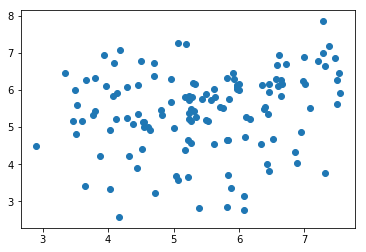

In [64]:
plt.scatter(y_test,predictions)

E:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


ValueError: Unknown label type: 'continuous'